# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [ ]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-13 00:19:45--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc488d6154562edf1a9a3cb75b54.dl.dropboxusercontent.com/cd/0/inline/CQ5m1WtnYyarfidLQSawrnYB7k0rAox73Sv2e-Tj0LKvvVboVU_q7qH7MpXZYP3SLRz8fYFEn0BtogRFNHwBb8X3zTCSwHiDzdGVKcNLbomD_sHMuvG19jiTZWc625vc_5pbxokpUzpfaVgZRyvHwF3p/file# [following]
--2024-04-13 00:19:46--  https://uc488d6154562edf1a9a3cb75b54.dl.dropboxusercontent.com/cd/0/inline/CQ5m1WtnYyarfidLQSawrnYB7k0rAox73Sv2e-Tj0LKvvVboVU_q7qH7MpXZYP3SLRz8fYFEn0BtogRFNHwBb8X3zTCSwHiDzdGVKcNLbomD_sHMuvG19jiTZWc625vc_5pbxokpUzpfaVgZRyvHwF3p/file
Resolving uc488d6154562edf1a9a3cb75b54.dl.dropboxusercontent.com (uc488d6154562edf1a9a3cb75b54.dl.dropboxusercontent.com)... 162.125.65.15, 26

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [ ]:
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)
print(df.head())
df.isnull()
df.fillna(df.mean(),inplace=True)
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


Get a brief description of the dataset

In [ ]:
# TODO: you can use .info() and .description()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [ ]:
# TODO: drop MEDV and convert to numpy array
X = df.iloc[:,:-1].to_numpy()

look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

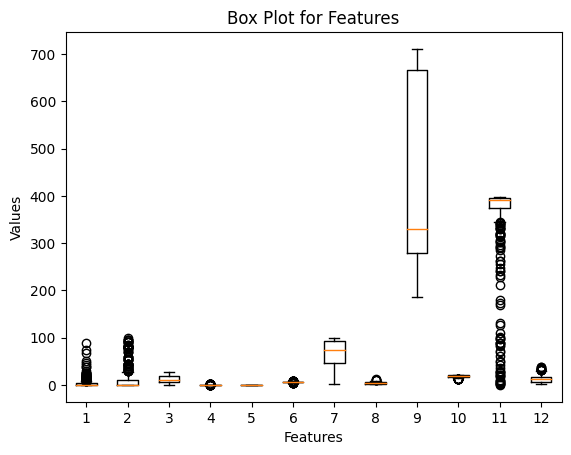

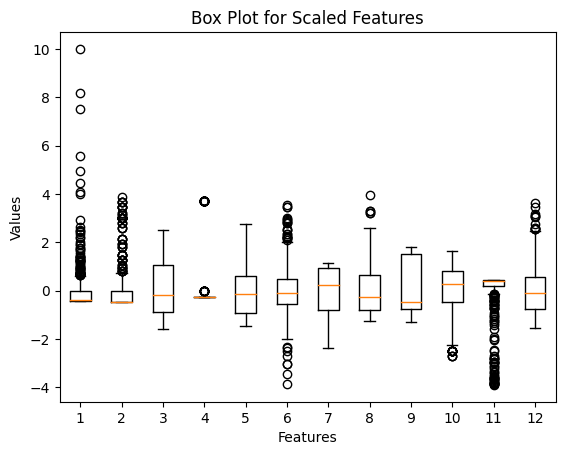

In [16]:
plt.boxplot(X)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot for Features')
plt.show()

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.boxplot(X_scaled)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot for Scaled Features')
plt.show()

add polynomial features to increase model complexity!



In [17]:
polyTransformer = PolynomialFeatures()
polyTransformer.fit(X_scaled)
X_poly_scaled = polyTransformer.transform(X_scaled)
X_powers = polyTransformer.powers_

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [18]:
# TODO: extract the MEDV
y = df.iloc[:,-1].to_numpy()



Split the dataset into two parts such that the training set contains 80% of the samples.

In [19]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled,y,test_size =0.2)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [20]:
# TODO: Use sklearn
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)



LinearRegression()

Get the coefficients of the variables and visualize it

intercept: 19.61775976399041


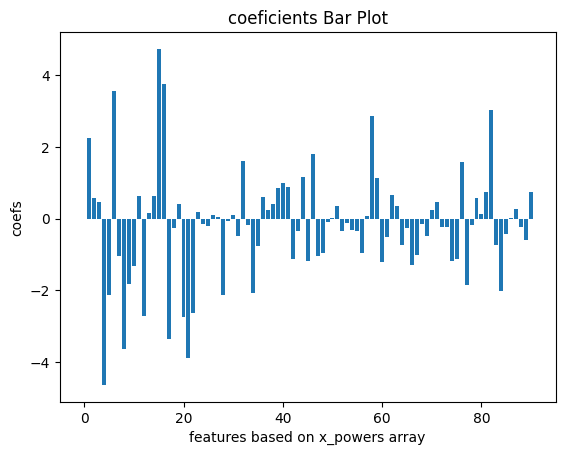

In [22]:
coefs = lr_model.coef_
intercept = lr_model.intercept_

print(f'intercept: {intercept}')
plt.bar(list(range(X_powers.shape[0])),coefs)
plt.xlabel('features based on x_powers array')
plt.ylabel('coefs')
plt.title('coeficients Bar Plot')
plt.show()


Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [24]:
# TODO: Calculate R² score and MSE on the training dataset

y_pred_train = lr_model.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
print(f"R² Score (on training data): {r2}")

mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error (on training data): {mse}")

R² Score (on training data): 0.9137389486649208
Mean Squared Error (on training data): 7.380632393662889


Predict the value of "y" for each "x" belonging to the "testing" set

In [25]:
y_pred_test = lr_model.predict(X_test)

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [26]:
# TODO: Use Lasso from sklearn library
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=1)

Get the coefficients of the variables and visualize it.

intercept: 21.602196517688775


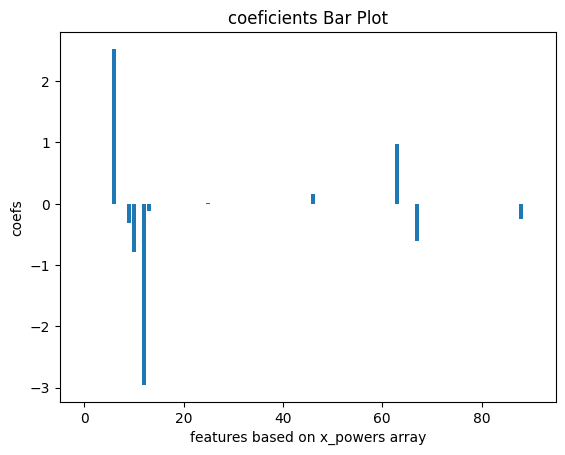

In [27]:
lasso_coefs = lasso_model.coef_
lasso_intercept = lasso_model.intercept_
print(f'intercept: {lasso_intercept}')
plt.bar(list(range(X_powers.shape[0])),lasso_coefs)
plt.xlabel('features based on x_powers array')
plt.ylabel('coefs')
plt.title('coeficients Bar Plot')
plt.show()

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Your Answer Goes here.
1. applying L1 regularization puts a penalty on each weight to where if they dont reduce the loss enough they wont be allowed to have a large number. so if they are irrelavent they will go towards zero and lasso lets the irrelevant wights to be exactly zero. this will reduce overfitting on the training data like in the basic linear regression earlier.

2. the higher the alpha the more penalty will be on the weight size and the remaining non-zero wights need to have very high affect on the prediction.

Get the score value on train *dataset*


In [28]:
# TODO: Calculate R² score and MSE on the training dataset
y_lasso_pred_train = lasso_model.predict(X_train)

lasso_r2 = r2_score(y_train, y_lasso_pred_train)
print(f"R² Score (on training data): {lasso_r2}")

lasso_mse = mean_squared_error(y_train, y_lasso_pred_train)
print(f"Mean Squared Error (on training data): {lasso_mse}")

R² Score (on training data): 0.7671450795649108
Mean Squared Error (on training data): 19.923436385108307


Predict the value of "y" for each "x" belonging to the "testing" set

In [29]:
y_lasso_pred_test = lasso_model.predict(X_test)

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [35]:
# TODO: Use Ridge from sklearn library
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)

Ridge()

Get the coefficients of the variables and visualize it.

intercept: 20.080665376339027


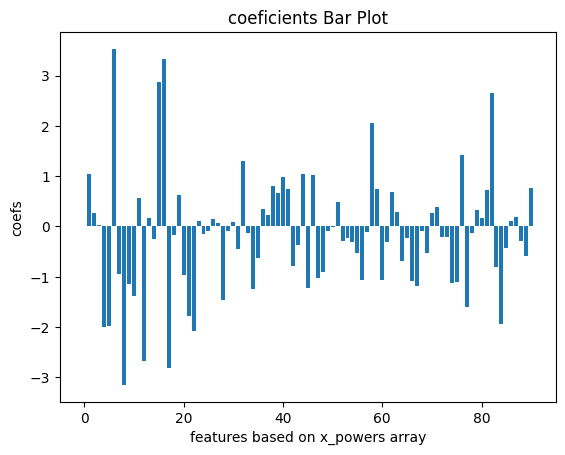

In [36]:
ridge_coefs = ridge_model.coef_
ridge_intercept = ridge_model.intercept_
print(f'intercept: {ridge_intercept}')
plt.bar(list(range(X_powers.shape[0])),ridge_coefs)
plt.xlabel('features based on x_powers array')
plt.ylabel('coefs')
plt.title('coeficients Bar Plot')
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

answer:
ridge regression doesnt put any coeficent exactly equal to zero (lasso does feature selection and ridge shrinks) and the regularization parameter in general has less impact than in lasso . it is smoother and mor easy going. the rest is exactly like lasso . the more alpha the more penalty there is and coeficients need to have higher affect in predicting to avoid becomming closer to zero.


Get the score value on train *dataset*

In [37]:
# TODO: Calculate R² score and MSE on the training dataset
y_ridge_pred_train = ridge_model.predict(X_train)

ridge_r2 = r2_score(y_train, y_ridge_pred_train)
print(f"R² Score (on training data): {ridge_r2}")

ridge_mse = mean_squared_error(y_train, y_ridge_pred_train)
print(f"Mean Squared Error (on training data): {ridge_mse}")

R² Score (on training data): 0.9128206819740798
Mean Squared Error (on training data): 7.459200748436536


Predict the value of "y" for each "x" belonging to the "testing" set



In [38]:
y_ridge_pred_test = ridge_model.predict(X_test)

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [41]:
# HINT: Use DataFrame tools

#test r2 and mse:
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

lasso_r2_test = r2_score(y_test, y_lasso_pred_test)
lasso_mse_test = mean_squared_error(y_test, y_lasso_pred_test)

ridge_r2_test = r2_score(y_test, y_ridge_pred_test)
ridge_mse_test = mean_squared_error(y_test, y_ridge_pred_test)

summary_dict = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    ' MSE (Train)': [mse, lasso_mse, ridge_mse],
    'MSE (Test)': [mse_test, lasso_mse_test, ridge_mse_test],
    'R² Score (Train)': [r2, lasso_r2, ridge_r2],
    'R² Score (Test)': [r2_test, lasso_r2_test, ridge_r2_test]
}

summary_df = pd.DataFrame(summary_dict)
print(summary_df)


               Model   MSE (Train)  MSE (Test)  R² Score (Train)  \
0  Linear Regression      7.380632   13.994346          0.913739   
1   Lasso Regression     19.923436   22.211765          0.767145   
2   Ridge Regression      7.459201   12.737143          0.912821   

   R² Score (Test)  
0         0.817581  
1         0.710466  
2         0.833969  


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

answer: due to overfitting the basic linear model is performing better on train and worse on test data than the others. the ridge is performing best on test data because of higher regularization.the lasso is performing worse because of too much regularization (maybe poor choice of alpha or penalty parameter)